**TEXT PREPROCESSING AND ENTITY RECOGNITION USING STANZA**

In [2]:
!pip install stanza
import stanza
stanza.download('en')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [3]:
nlp = stanza.Pipeline('en', processors='tokenize,ner')
text = "F.M.C. No. 911F SCHENKER INC 97-CANAL LANDING BLVD STE-7 US-ROCHESTER, NY-14626 Schenker Contact: GINA SPIZZERI / Date 11/30/2022 Shipment:7887220235 S.T.T: 7670160731754 Flight:UA-181/24 HAWB Number:MHG-34514835 Corning Inc MAWB Number:016-24534576 c/o Cass Information Systems Inc Dep./Des.13001 Hollenberg Dr Pieces Gross Weight: 82.0 Kg Bridgeton, 63044-2410 Chargeable Wt: 82.0 Kg Entry No Outside HAWB Bill-To: 000990425 Importer: Corning Inc: Riverfront Plz Corning Inc: 905 Addison Rd Corning, NY 14831-0001 Painted Post, NY 14870-9726 Shipper: Ultimate Consignee: Corning GmbH Corning Inc 792 Addison Rd D-67661 Kaiserslautern Painted Post,NY 14870-8523 Nature Of Goods: DIES & UNFIRED FILTE Shp. Ref.:SHIPPER REFERENCE: 10000252762022SD0C, 2022-11-58 CHARGES INVOICE AMOUNT Airfreight $300.94 USD Air Waybill Fee $75.00 USD Airport Handling Charges $50.00 USD Delivery Charges $145.00 USD TOTAL INVOICE AMOUNT $570.94 USD If you are importer of record, payment to the broker will not relieve you of the liability for customs charges (duties, taxes, or other debts owed customs) in the event the charges are not paid by the broker, Therefore, if you pay by check, customs charges may be paid with a separate check payable to U.S, customs Service which will be delivered to customs by the broker. INVOICE DUE DATE 60 DAYS FROM INVOICE DATE PLEASE REMIT PAYMENT TO ; SCHENKER INC., P.O. BOX 7247-7623, PHILADELPHIA, PA 19170-7623 IMPORTANT: Alll business undertaken on behalf of this transaction is subject to Schenker, Inc.'s General Terms and Conditions of Service as stated on the reverse side hereof and in accordance to the Tariffs and the most current version of the General Terms and Conditions of Service as stated on the Schenker USA website at www.dbschenkerusa.com."
doc = nlp(text)
for sentence in doc.sentences:
    print("Sentence: ", " ".join([word.text for word in sentence.words]))
    for entity in sentence.ents:
        print(f"Entity: {entity.text}, Type: {entity.type}")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Sentence:  F.M.C. No. 911F SCHENKER INC 97-CANAL LANDING BLVD STE-7 US- ROCHESTER , NY - 14626 Schenker Contact : GINA SPIZZERI / Date 11/30/2022 Shipment:7887220235 S.T.T : 7670160731754 Flight:UA-181/24 HAWB
Entity: ROCHESTER, Type: GPE
Sentence:  Number:MHG-34514835 Corning Inc MAWB Number:016-24534576 c /o Cass Information Systems Inc Dep./Des.13001 Hollenberg Dr Pieces Gross Weight : 82.0 Kg Bridgeton , 63044-2410 Chargeable Wt : 82.0 Kg Entry No Outside HAWB Bill - To : 000990425 Importer : Corning Inc : Riverfront Plz Corning Inc : 905 Addison Rd Corning , NY 14831-0001 Painted Post , NY 14870-9726 Shipper : Ultimate Consignee : Corning GmbH Corning Inc 792 Addison Rd D-67661 Kaiserslautern Painted Post , NY 14870 - 8523 Nature Of Goods : DIES & UNFIRED FILTE Shp. Ref. : SHIPPER REFERENCE : 10000252762022SD0C , 2022-11-58 CHARGES INVOICE AMOUNT
Entity: Corning Inc, Type: ORG
Entity: Riverfront Plz Corning Inc, Type: ORG
Entity: 905, Type: CARDINAL
Entity: NY, Type: GPE
Entity: K

**ENTITY TYPE AND COUNT**

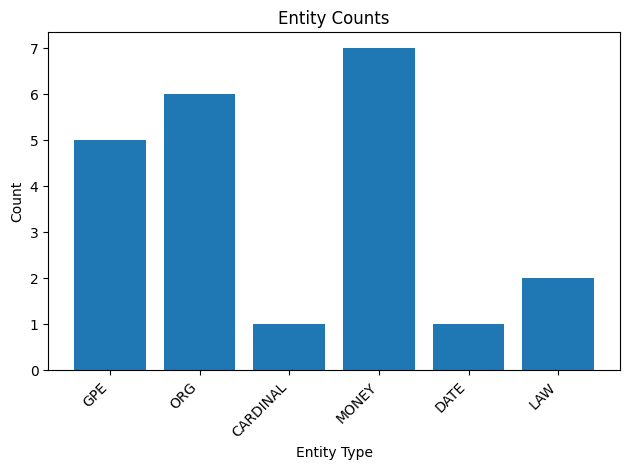

In [16]:
import matplotlib.pyplot as plt

entity_counts = {}
for sentence in doc.sentences:
    for entity in sentence.ents:
        entity_type = entity.type
        if entity_type in entity_counts:
            entity_counts[entity_type] += 1
        else:
            entity_counts[entity_type] = 1

plt.bar(entity_counts.keys(), entity_counts.values())
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.title('Entity Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**ENTITY RELATIONSHIP DIAGRAM**

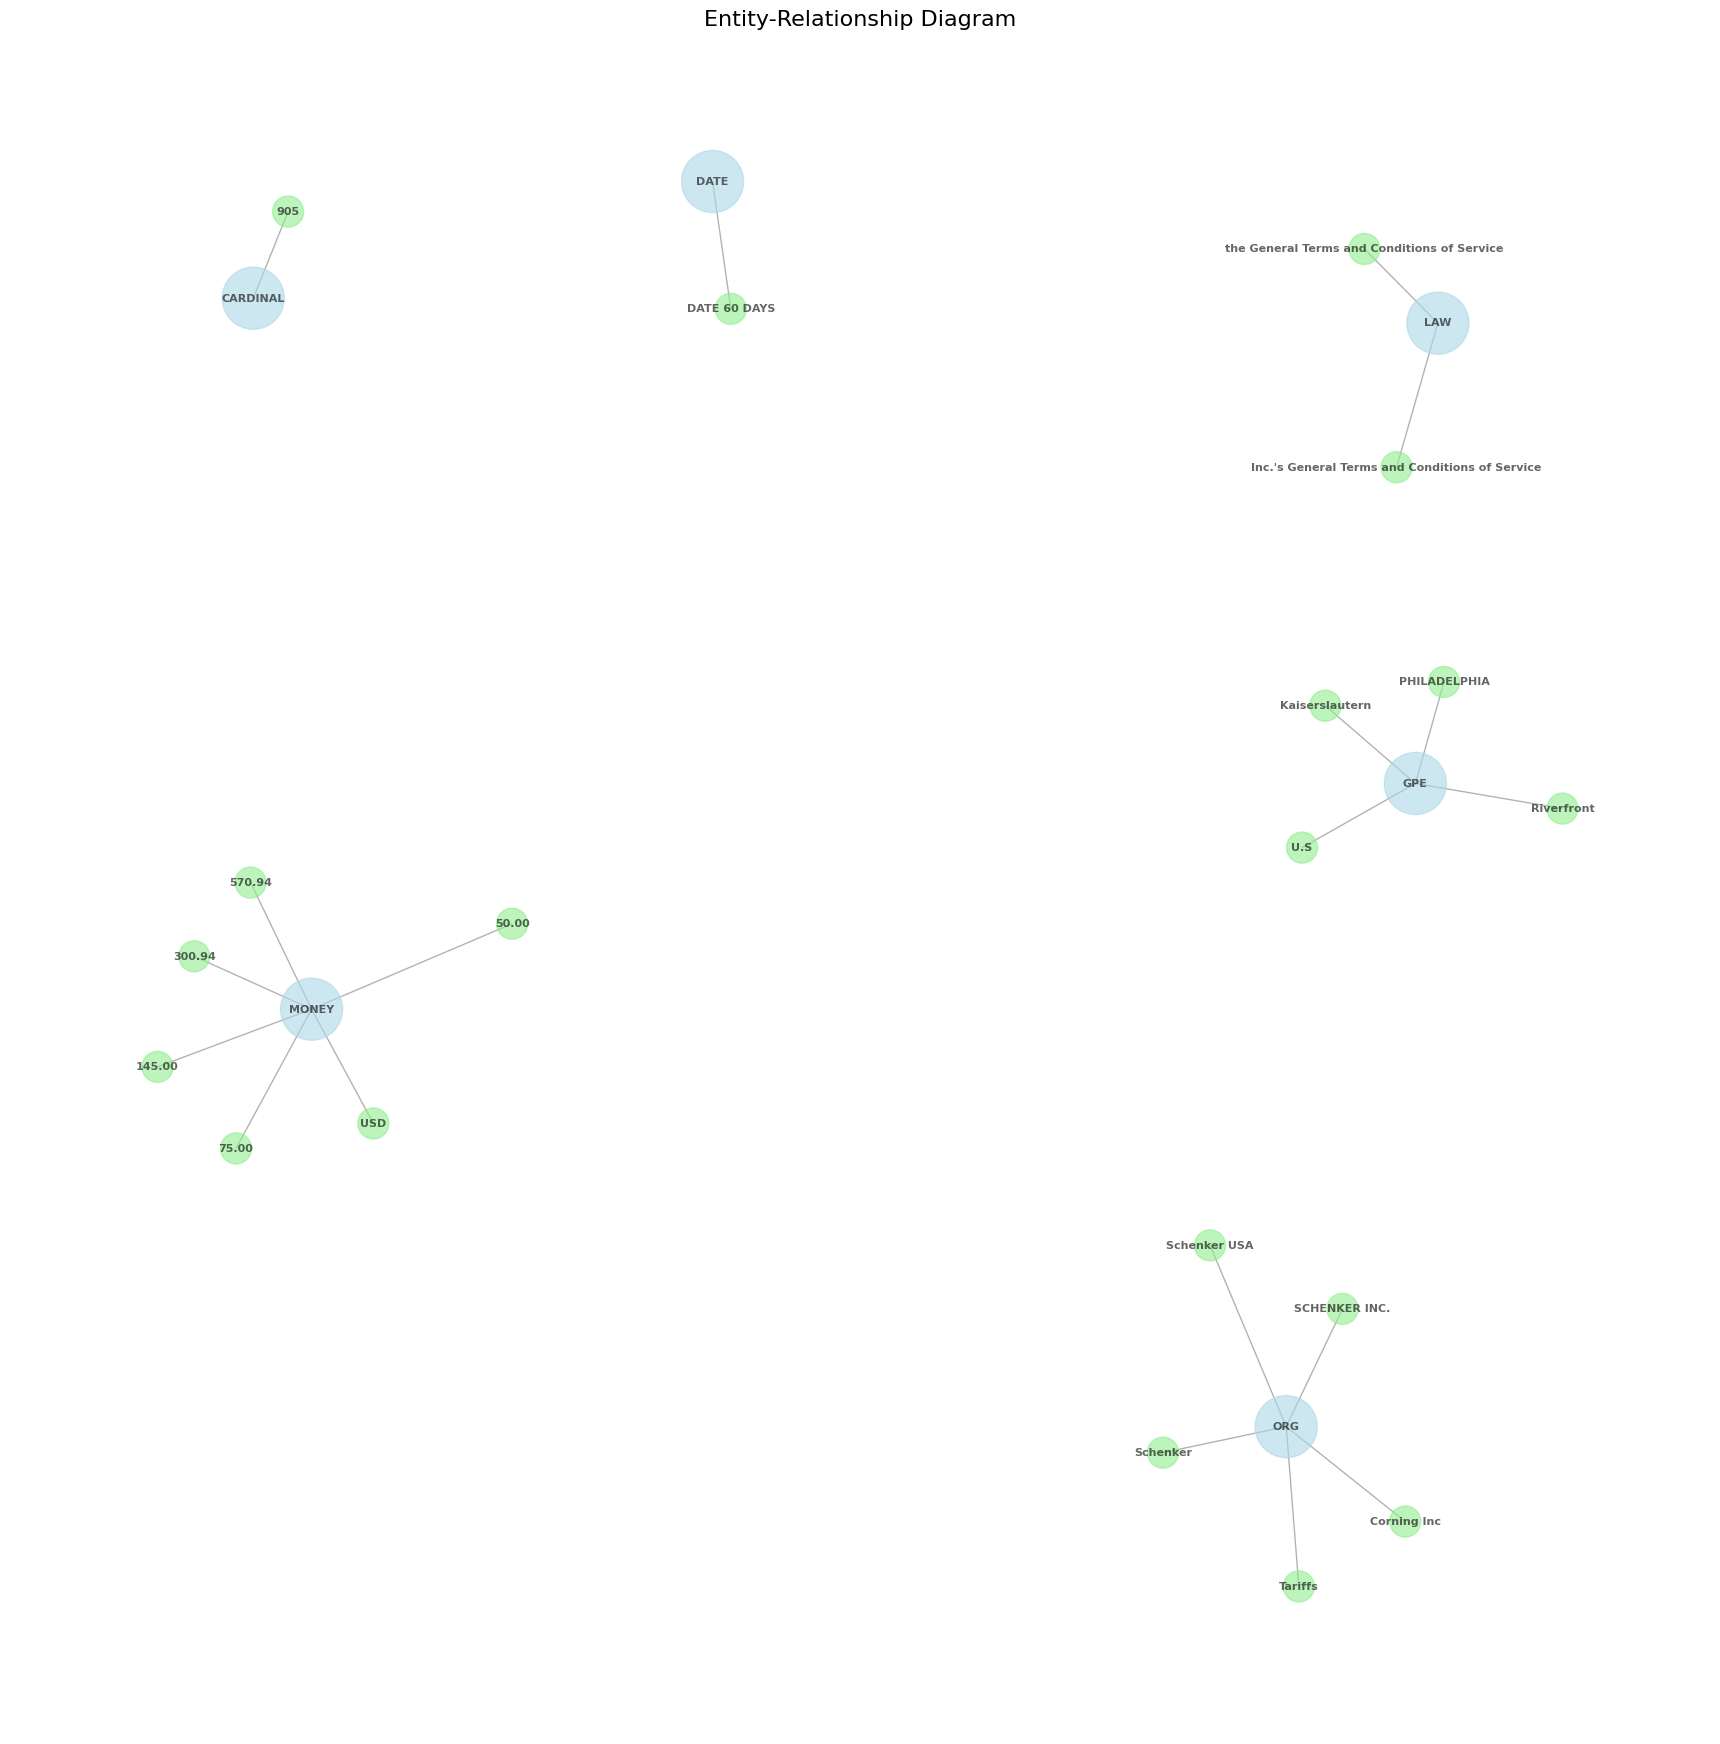

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

data = {
    'ORG': {'Corning Inc', 'SCHENKER INC.', 'Tariffs', 'Schenker', 'Schenker USA'},
    'GPE': {'PHILADELPHIA', 'U.S', 'Riverfront', 'Kaiserslautern'},
    'CARDINAL': {'905'},
    'MONEY': {'145.00', '300.94', '75.00', '570.94', '50.00', 'USD'},
    'DATE': {'DATE 60 DAYS'},
    'LAW': {'the General Terms and Conditions of Service', "Inc.'s General Terms and Conditions of Service"}
}

G = nx.Graph()

for category, items in data.items():
    G.add_node(category, label=category, color='lightblue', size=2000)
    for item in items:
        G.add_node(item, label=item, color='lightgreen', size=500)
        G.add_edge(category, item)

colors = [G.nodes[node].get('color', 'lightblue') for node in G.nodes]
sizes = [G.nodes[node].get('size', 100) for node in G.nodes]

plt.figure(figsize=(17, 17))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=sizes, font_size=8, font_weight='bold', edge_color='gray', alpha=0.6)
plt.title('Entity-Relationship Diagram', fontsize=16)
plt.show()